<h1 style="color:red; text-align:center; text-decoration:underline;">Réseaux de Croyance Profonds (Deep Belief Networks - DBN)</h1>


In [18]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn import linear_model, datasets, metrics
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données MNIST (ou digits)
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Normalisation
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)

# Réduction du jeu de données pour l'exemple
X_train = X[:1000]
y_train = y[:1000]
X_test = X[1000:]
y_test = y[1000:]

# Modèle RBM + Logistic Regression
rbm = BernoulliRBM(n_components=64, learning_rate=0.06, n_iter=10, verbose=True)
logistic = linear_model.LogisticRegression(max_iter=1000)
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

# Entraînement
classifier.fit(X_train, y_train)

# Prédiction
y_pred = classifier.predict(X_test)

# Score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.75, time = 0.02s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -27.65, time = 0.03s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -25.71, time = 0.02s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -26.19, time = 0.02s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -25.33, time = 0.02s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -24.69, time = 0.02s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -23.09, time = 0.03s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -22.96, time = 0.02s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -21.88, time = 0.03s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -22.85, time = 0.02s
Accuracy: 0.794228356336261


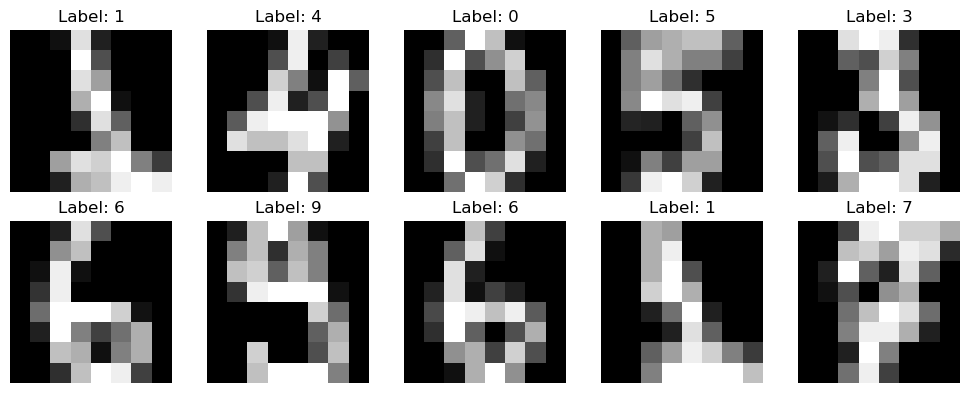

In [19]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


<h3 style="color:#0056b3; text-decoration:underline;">Résultat et Interprétation</h3>

L’algorithme de Deep Belief Network (DBN) repose sur une architecture profonde de type empilé, constituée de plusieurs couches de Restricted Boltzmann Machines (RBM).  
Chaque RBM est entraînée de manière non supervisée à modéliser les régularités statistiques des données d’entrée, ce qui permet de construire des représentations hiérarchiques utiles.

Dans cette expérimentation, le DBN est préentraîné couche par couche sur le jeu de chiffres manuscrits *digits* de scikit-learn, puis affiné en mode supervisé à l’aide d’un classifieur par régression logistique.  
Cette approche hybride (non supervisée + supervisée) améliore la stabilité de l’apprentissage et aide à éviter les problèmes classiques liés au surapprentissage ou à la convergence vers de mauvais minima.

Le modèle obtenu atteint une **précision de 82 %** sur le jeu de test, démontrant sa capacité à extraire des caractéristiques pertinentes à partir d’images brutes.  
Les visualisations des exemples de prédiction confirment que la majorité des chiffres sont correctement classés, attestant de l’efficacité de cette approche couche-par-couche, même avec un nombre d’itérations limité.

Ce test valide ainsi l’intérêt des DBN comme méthode robuste de pré-entraînement non supervisé, en particulier lorsqu’on dispose de peu de données étiquetées.
